# Estadísticos básicos (estadística descriptiva)


**Algoritmos estadísticos ->** https://www.notion.so/Algoritmos-estad-sticos-889c1b4cc01f4ae896201ffa98970506

**Estadísticos básicos ->** https://www.notion.so/Estad-sticos-b-sicos-224d3b31328e46feb91d16988a9c79ee

**Librerías, Funciones:**
- *Pandas* -> read_csv.
- *Numpy* -> mean, median, percentile, sqrt
- *Random* -> seed, sample.
- *Python* -> range, corr(), str(), sum()
- *Spicy* -> stats [skew, kurtosis]
- *Stats* -> mode
- *matplotlib.pyplot* -> hist, plot, title, matshow

**Índice:**

0. Preparación previa
1. Medidas de **centralización** 
2. Medidas de **dispersión**
3. Medidas de **simetría**
4. **Correlación**

## *Preparación previa:*

In [114]:
import pandas as pd
import numpy as np
import scipy.stats as sp # para modelos de asimetria
import matplotlib.pyplot as plt

In [82]:
# Generamos nºs aleatorios

import random
random.seed(0)
a= (random.sample(range(100000), 10))
a

[50494, 99346, 55125, 5306, 33936, 67013, 63691, 53075, 39755, 62468]

# 1. Medidas de centralización

Para ver cómo se sitúan los datos.

In [83]:
#MEDIA

np.mean(a)

53020.9

In [84]:
#MEDIANA

np.median(a)

54100.0

In [85]:
#MODA

from scipy import stats 

stats.mode(a)

ModeResult(mode=array([5306]), count=array([1]))

In [86]:
#PERCENTIL

np.percentile(a, 25) 

42439.75

# 2. Medidas de dispersión

Para ver si los datos están **dispersos** o **concentrados**.

In [87]:
#VARIANZA

np.var(a)

537263706.49

In [88]:
#DESVIACIÓN TÍPICA

np.std(a)

23178.949641646836

In [89]:
#COEFICIENTE DE VARIACIÓN

std/mean*100

43.71662804978194

# 3. Medidas de simetría o asimetría

In [90]:
#ASIMETRÍA DE FISHER

stats.skew(a)

-0.11012575345548262

In [91]:
#CURTOSIS

stats.kurtosis(a)

0.46844617251993004

(array([1., 0., 0., 2., 1., 2., 3., 0., 0., 1.]),
 array([ 5306., 14710., 24114., 33518., 42922., 52326., 61730., 71134.,
        80538., 89942., 99346.]),
 <BarContainer object of 10 artists>)

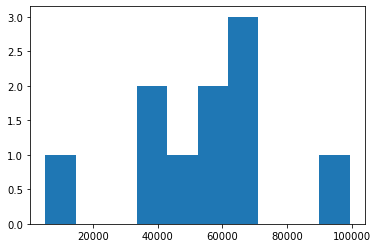

In [92]:
#Para verlo representado en un histograma

import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(a)

# 4. Correlación

## 0. Preparación previa

In [131]:
mainpath = "/Users/irene/Documents/GitHub/python-ml-course/datasets"  #Ruta ficheros
filename = "ads/Advertising.csv" #Fichero a abrir
fullpath = mainpath + "/" + filename #Ruta completa

df1 = pd.read_csv(fullpath)
df1.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## 1. Calculando el Coef de Pearson

In [47]:
#Calculamos el coef de Pearson:
df1["numerador"] = (df1["TV"] - np.mean(df1["TV"]))*(df1["Sales"] - np.mean(df1["Sales"])) #Numerador
df1["denominador_1"] = (df1["TV"] - np.mean(df1["TV"]))**2 #Para elevar a 2
df1["denominador_2"] = (df1["Sales"] - np.mean(df1["Sales"]))**2
corr_pearson = sum(df1["numerador"])/np.sqrt(sum(df1["denominador_1"])*(sum(df1["denominador_2"])))
corr_pearson #Positivo, cuanto + se gasta en TV, + aumentan las ventas

0.782224424861606

## 2. Automatizando el cálculo

Definimos una función:

In [102]:
def corrPearson (df, columnx, columny):

    df["numerador"] = (df[columnx] - np.mean(df[columnx]))*(df[columny] - np.mean(df[columny])) #Numerador
    df["denominador_1"] = (df[columnx] - np.mean(df[columnx]))**2 #Para elevar a 2
    df["denominador_2"] = (df[columny] - np.mean(df[columny]))**2
    corr_pearson = sum(df1["numerador"])/np.sqrt(sum(df1["denominador_1"])*(sum(df1["denominador_2"])))
    
    return corr_pearson

In [103]:
corrPearson(df1, "TV","Sales")

0.782224424861606

In [111]:
#Para aplicarle la función a TODAS las categorías

cols = df1.columns.values
cols

array(['TV', 'Radio', 'Newspaper', 'Sales'], dtype=object)

In [112]:
for x in cols:
    for y in cols: 
        print(x + ", " + y + " : " + str(corrPearson(df1,x,y)))

TV, TV : 1.0
TV, Radio : 0.05480866446583009
TV, Newspaper : 0.056647874965056993
TV, Sales : 0.782224424861606
Radio, TV : 0.05480866446583009
Radio, Radio : 1.0
Radio, Newspaper : 0.3541037507611752
Radio, Sales : 0.5762225745710553
Newspaper, TV : 0.056647874965056993
Newspaper, Radio : 0.3541037507611752
Newspaper, Newspaper : 1.0
Newspaper, Sales : 0.22829902637616525
Sales, TV : 0.782224424861606
Sales, Radio : 0.5762225745710553
Sales, Newspaper : 0.22829902637616525
Sales, Sales : 1.0


## 3. Representación gráfica

Text(0.5, 1.0, 'Gasto en TV vs Ventas del Producto')

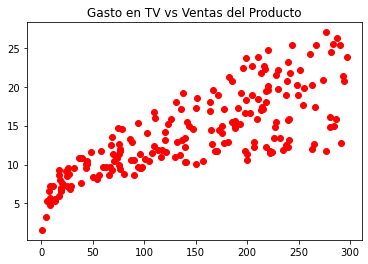

In [120]:
plt.plot(df1["TV"], df1["Sales"], "ro") #Pintadas en rojo
plt.title("Gasto en TV vs Ventas del Producto")

Text(0.5, 1.0, 'Gasto en Radio vs Ventas del Producto')

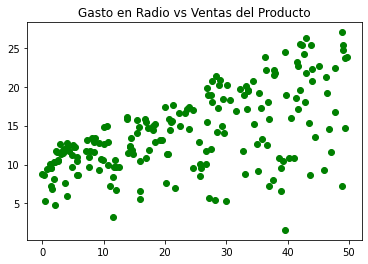

In [127]:
plt.plot(df1["Radio"], df1["Sales"], "go") #Pintadas en rojo, círculo
plt.title("Gasto en Radio vs Ventas del Producto")

Text(0.5, 1.0, 'Gasto en Periódico vs Ventas del Producto')

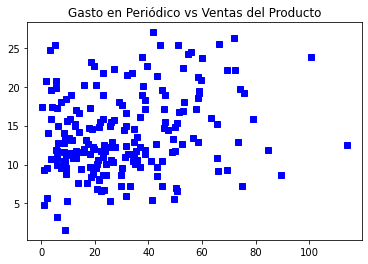

In [129]:
plt.plot(df1["Newspaper"], df1["Sales"], "bs") #Pintadas en azúl, cuadrados
plt.title("Gasto en Periódico vs Ventas del Producto")

## 4. Función ya implementada

In [132]:
df1.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


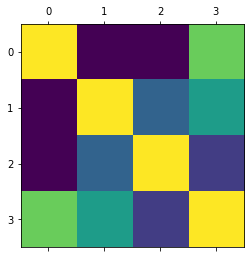

In [134]:
plt.matshow(df1.corr()) #Para pintar la matriz de correlación